## Iris Dataset

This is a well-known data set containing iris species and sepal and petal measurements.

Various Pandas plotting methods: [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
filepath = "iris_data.csv"
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Number of rows
print(f'Number of rows: {data.shape[0]}')

# Column names
print(f'\nColumn names: {data.columns.tolist()}')

# Data types
print(f'\nData types:\n{data.dtypes}')

Number of rows: 150

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [12]:
# number of each species present
data.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [14]:
# mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement

stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [18]:
# mean and median for each species
data.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [19]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

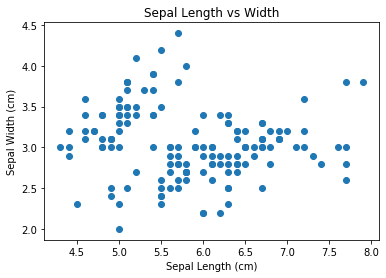

In [22]:
# A simple scatter plot of sepal_length vs sepal_width
ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

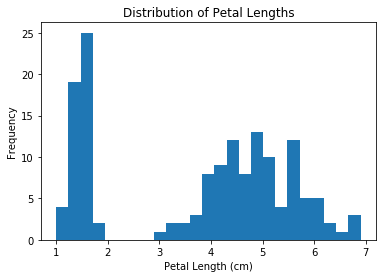

In [23]:
# Histogram of petal_length 
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

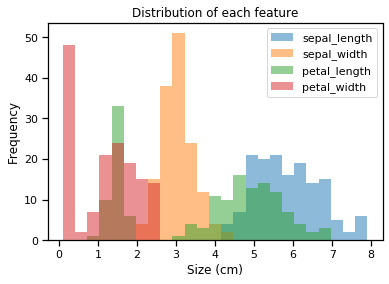

In [27]:
# Histogram of each feature together

import seaborn as sns
sns.set_context('notebook')

ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)')
ax.set_title('Distribution of each feature');

c:\users\shaur\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


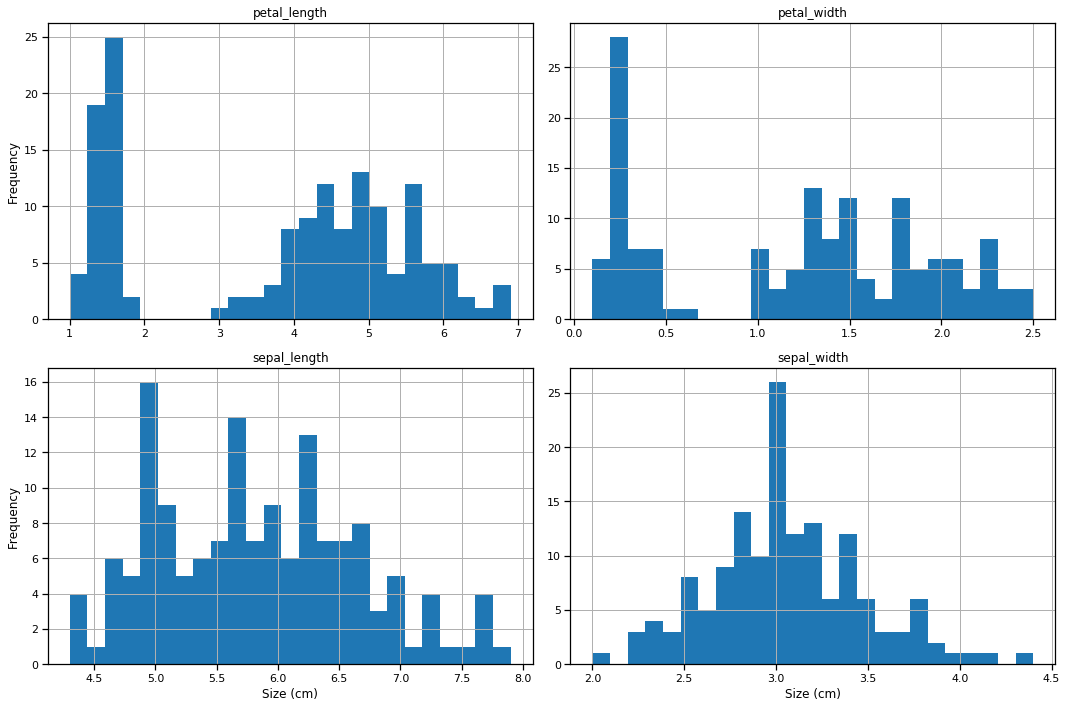

In [51]:
# Histogram of each feature separately

fig,axes=plt.subplots(figsize=(15,10))
axList = data.hist(bins=25,ax=axes)

for ax in axList.flatten():
    if ax.is_last_row(): # Adding x label to last row 
        ax.set_xlabel('Size (cm)')
    if ax.is_first_col(): # Adding y label to first column
        ax.set_ylabel('Frequency')
        
plt.tight_layout()

c:\users\shaur\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds


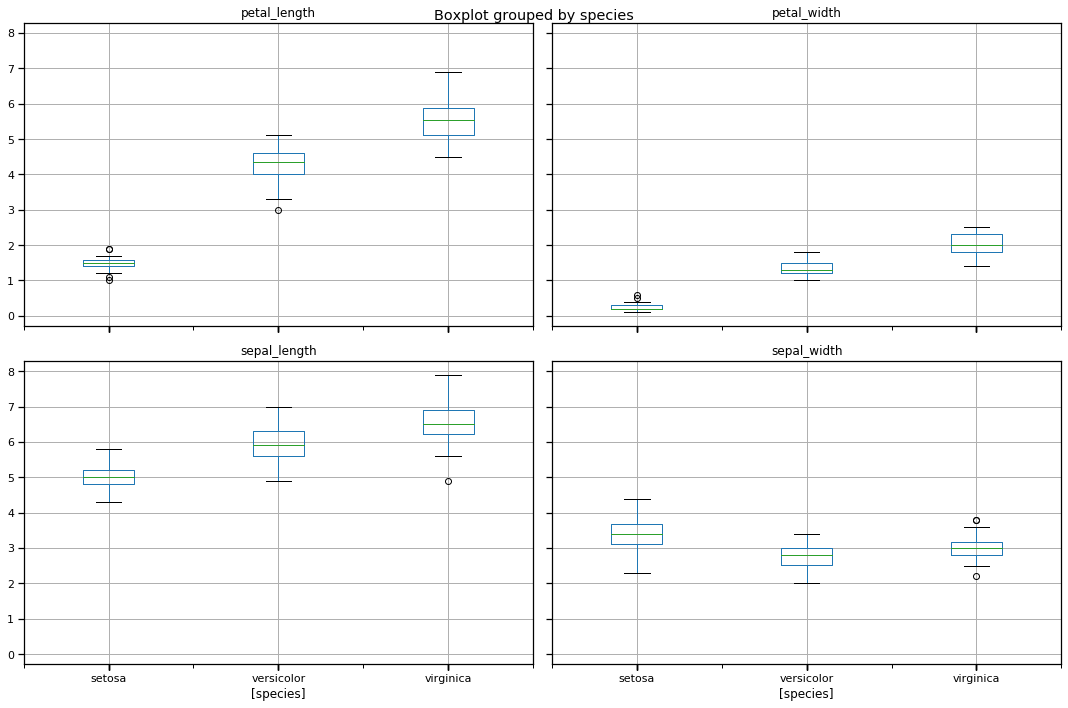

In [53]:
# Boxplots of each feature separately

fig,ax=plt.subplots(figsize=(15,10))
data.boxplot(by='species',ax=ax)
plt.tight_layout();

  species   measurement  size
0  setosa  sepal_length   5.1
1  setosa   sepal_width   3.5
2  setosa  petal_length   1.4
3  setosa   petal_width   0.2
4  setosa  sepal_length   4.9


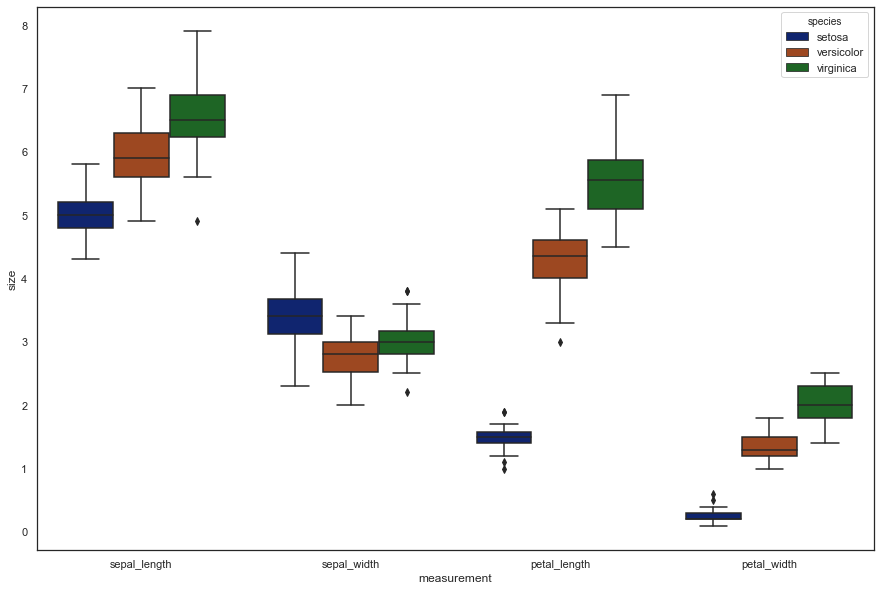

In [59]:
# single boxplot where the features are separated in the x-axis and species are colored with different hues

plot_data = data.set_index('species').stack().to_frame().reset_index().rename(columns={0:'size', 'level_1':'measurement'})
print(plot_data.head())

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(15,10))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

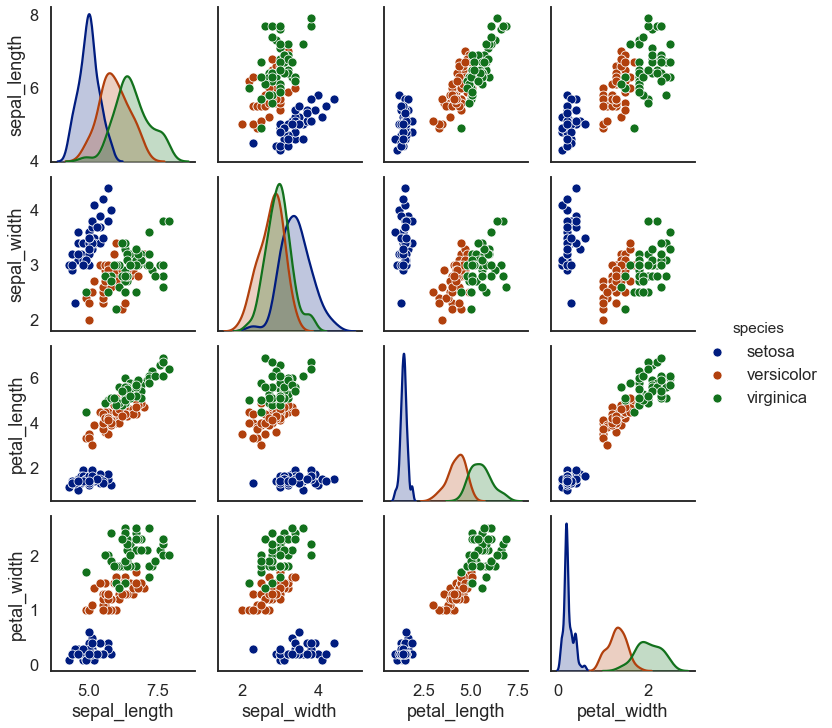

In [60]:
# Pairplot to examine the correlation between each of the measurements

sns.set_context('talk')
sns.pairplot(data, hue='species');